In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
fig = px.line(df, x="Month", y="#Passengers", title='Line plot hueeehehe')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [6]:
fig = px.area(df, x="Month", y="#Passengers", title='Area chart :D', range_x=['1956-01','1960-01'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [7]:
fig = px.histogram(df, x="Month", y="#Passengers")
fig.update_traces(xbins_size="M12")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12", tickformat="%b\n%Y")
fig.update_layout(bargap=0.5)
fig.show()

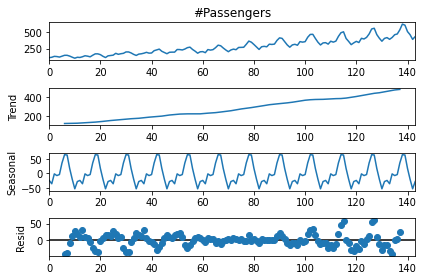

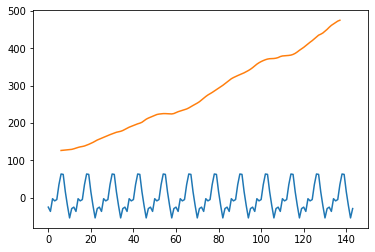

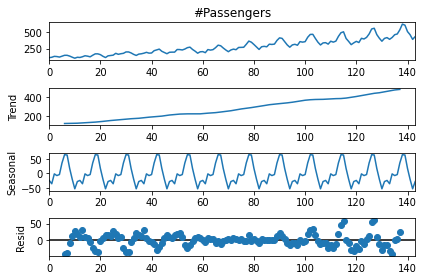

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['#Passengers'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376]


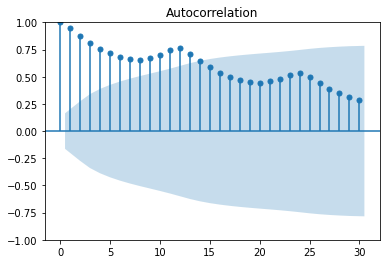

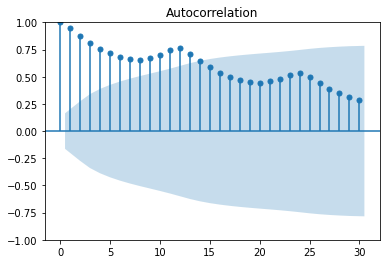

In [9]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_values = acf(df['#Passengers'])
print(acf_values)
plot_acf(df['#Passengers'], lags=30)

[ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579
  0.00412541  0.15616955  0.10370833  0.28878144  0.20691805  0.2411297
 -0.15800498 -0.7183246  -0.08948064  0.22160591  0.13462253  0.11561572
  0.1948294   0.09665618 -0.20215868 -0.0936381 ]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



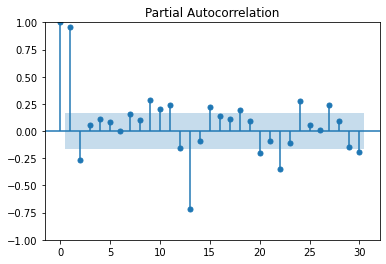

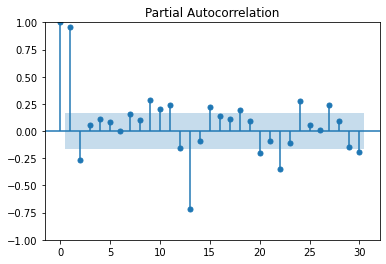

In [10]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

pacf_values = pacf(df['#Passengers'])
print(pacf_values)
plot_pacf(df['#Passengers'], lags=30)

In [11]:
df1 = df.copy()
df1['Time'] = np.arange(len(df.index))

df1.head()

,Month,#Passengers,Time
0,1949-01,112,0
1,1949-02,118,1
2,1949-03,132,2
3,1949-04,129,3
4,1949-05,121,4


In [12]:
from sklearn.linear_model import LinearRegression

X = df1.loc[:, ['Time']]
y = df1.loc[:, '#Passengers']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

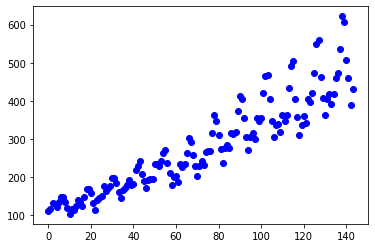

In [13]:
plt.scatter(X, y, color ='b')

In [14]:
print(model.score(X, y))
c = model.intercept_
m = model.coef_

0.853638165603188


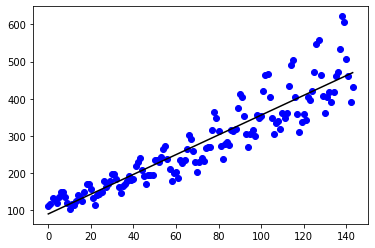

In [15]:
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
  
plt.show()


In [16]:
year = [[1927, 2493],
        [1973, 2638], 
        [1974, 2699], 
        [1975, 3038], 
        [1976, 3745], 
        [1977, 4079], 
        [1978, 4688]]

road_accidents = pd.DataFrame(data = year, columns = ['Year', 'Accidents'])

In [17]:
road_accidents

,Year,Accidents
0,1927,2493
1,1973,2638
2,1974,2699
3,1975,3038
4,1976,3745
5,1977,4079
6,1978,4688


In [18]:
fig=px.histogram(road_accidents, x="Year", y="Accidents")
fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(bargap=0.5)
fig.show()

In [19]:
fig=px.line(road_accidents,x="Year", y="Accidents")
fig.update_xaxes(rangeslider_visible=True)
fig.show()